In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Algerian_forest_fires_cleaned_dataset.csv')

In [3]:
df.head()

,Day,Month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [4]:
df.drop(['Day','Month','year'],axis=1,inplace=True)

In [5]:
df['Classes'] = np.where(df['Classes'].str.contains('not fire'),0,1)

In [6]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [7]:
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [8]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [9]:
df.tail()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1
242,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0,1


### Splitting data into independent and dependent features

In [11]:
x = df.drop('FWI',axis=1)
y = df['FWI']

In [12]:
x.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [13]:
y.head()

0    0.5
1    0.4
2    0.1
3    0.0
4    0.5
Name: FWI, dtype: float64

### Train Test Split

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [16]:
x_train.shape

(182, 11)

In [17]:
x_test.shape

(61, 11)

Text(0.5, 1.0, 'Correlation Matrix Heatmap')

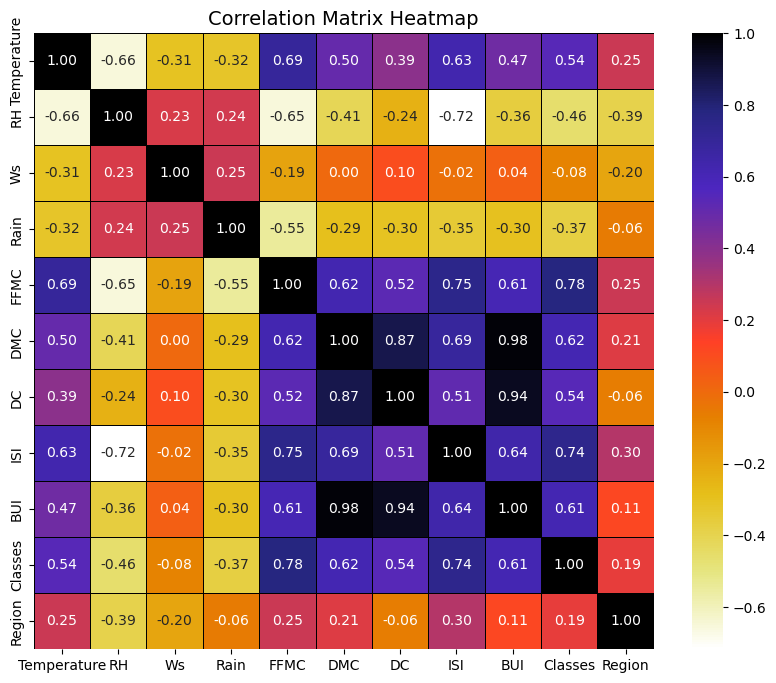

In [18]:
plt.figure(figsize=(10,8))
sns.heatmap(x_train.corr(),annot=True,fmt=".2f",cmap=plt.cm.CMRmap_r,linewidth=0.5,linecolor='black')
plt.title("Correlation Matrix Heatmap", fontsize=14)

In [19]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:  # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)

    return col_corr

In [20]:
correlated_features = correlation(x_train,0.9) # 70% of correlated features

In [21]:
correlated_features

{'BUI'}

In [22]:
x_train.drop(correlated_features,axis=1,inplace=True)

In [23]:
x_test.drop(correlated_features,axis=1,inplace=True)

In [24]:
x_train.shape

(182, 10)

## Feature Scaling or Standardization

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [27]:
x_train_scaled

array([[-0.84284248,  0.78307967,  1.29972026, ..., -0.62963326,
        -1.10431526, -0.98907071],
       [-0.30175842,  0.64950844, -0.59874754, ..., -0.93058524,
        -1.10431526,  1.01105006],
       [ 2.13311985, -2.08870172, -0.21905398, ...,  2.7271388 ,
         0.90553851,  1.01105006],
       ...,
       [-1.9250106 ,  0.9166509 ,  0.54033314, ..., -1.06948615,
        -1.10431526, -0.98907071],
       [ 0.50986767, -0.21870454,  0.16063958, ...,  0.5973248 ,
         0.90553851,  1.01105006],
       [-0.57230045,  0.98343651,  2.05910739, ..., -0.86113478,
        -1.10431526, -0.98907071]])

## Box plots to understand the effect of standard scaler

Text(0.5, 1.0, 'X train after scaling')

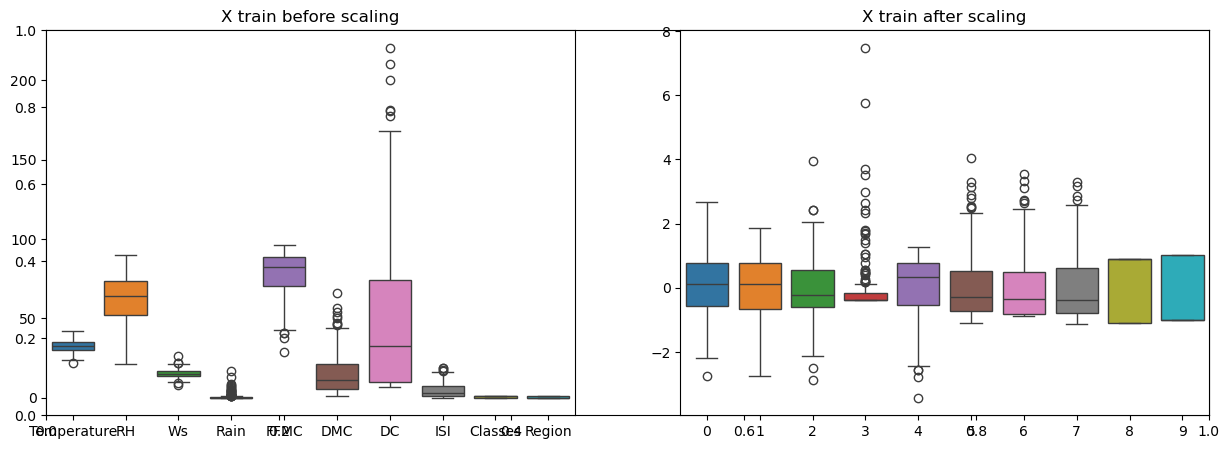

In [29]:
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=x_train)
plt.title('X train before scaling')
plt.subplot(1,2,2)
sns.boxplot(data=x_train_scaled)
plt.title('X train after scaling')

# Applying Models
### 1. Linear Regression Model

Mean Absolute Error  0.5170107980662412
R2 Score 0.9830565611009445


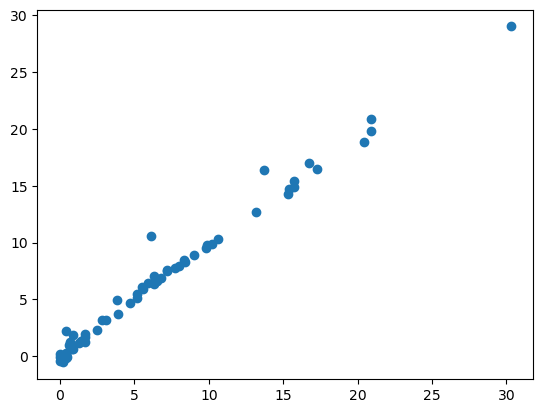

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error , r2_score
regression = LinearRegression()
regression.fit(x_train_scaled,y_train)
y_pred = regression.predict(x_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print('Mean Absolute Error ',mae)
print('R2 Score',score)
plt.scatter(y_test,y_pred)

### 2. Lasso Regression

Mean Absolute Error  1.1257992990774723
R2 Score 0.9498931628519822


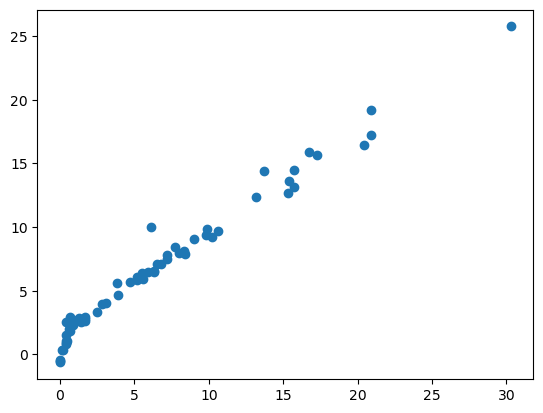

In [33]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error , r2_score
lasso = Lasso()
lasso.fit(x_train_scaled,y_train)
y_pred = lasso.predict(x_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print('Mean Absolute Error ',mae)
print('R2 Score',score)
plt.scatter(y_test,y_pred)

### 3. Ridge Regression

Mean Absolute Error  0.5292519766274818
R2 Score 0.9824051915524251


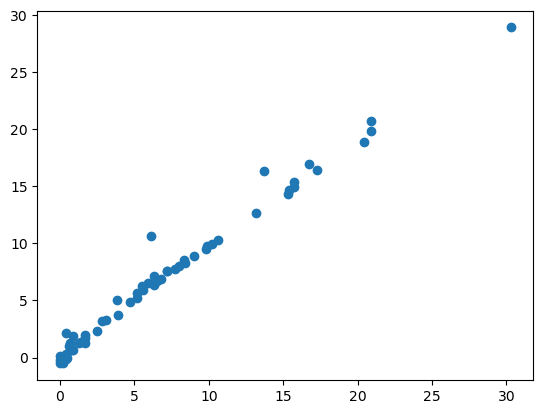

In [35]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error , r2_score
ridge = Ridge()
ridge.fit(x_train_scaled,y_train)
y_pred = ridge.predict(x_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print('Mean Absolute Error ',mae)
print('R2 Score',score)
plt.scatter(y_test,y_pred)

### 3. Elastic Net Regression

Mean Absolute Error  1.7704255521425287
R2 Score 0.8887824924177792


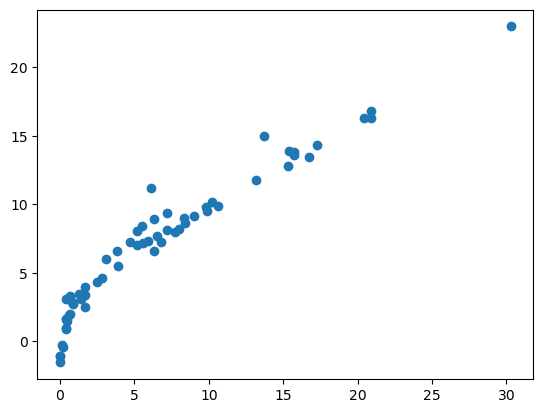

In [37]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error , r2_score
elastic = ElasticNet()
elastic.fit(x_train_scaled,y_train)
y_pred = elastic.predict(x_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print('Mean Absolute Error ',mae)
print('R2 Score',score)
plt.scatter(y_test,y_pred)

# Cross Validation Starts

### 1. LassoCV

Mean Absolute Error  0.5537550153494094
R2 Score 0.9812242879221943


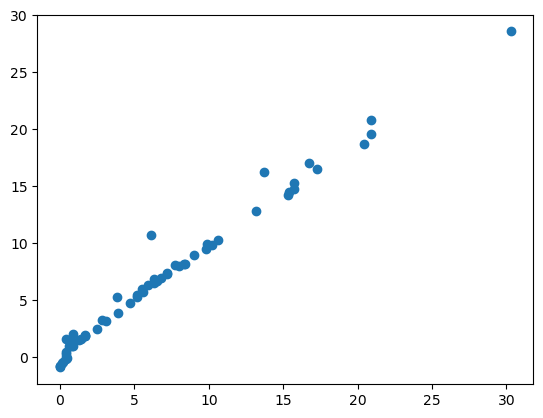

In [40]:
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_absolute_error , r2_score
lassocv = LassoCV()
lassocv.fit(x_train_scaled,y_train)
y_pred = lassocv.predict(x_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print('Mean Absolute Error ',mae)
print('R2 Score',score)
plt.scatter(y_test,y_pred)

### 2. Ridge CV

Mean Absolute Error  0.5292519766274818
R2 Score 0.9824051915524251


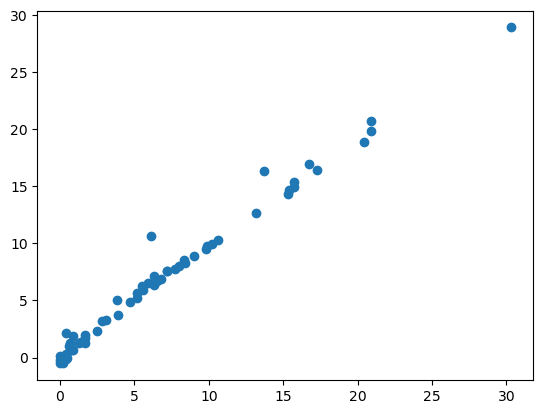

In [42]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_absolute_error , r2_score
ridgecv = RidgeCV(cv=5)
ridgecv.fit(x_train_scaled,y_train)
y_pred = ridgecv.predict(x_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print('Mean Absolute Error ',mae)
print('R2 Score',score)
plt.scatter(y_test,y_pred)

### 3. Elastic Net CV

Mean Absolute Error  0.6133340328806131
R2 Score 0.9789643451363162


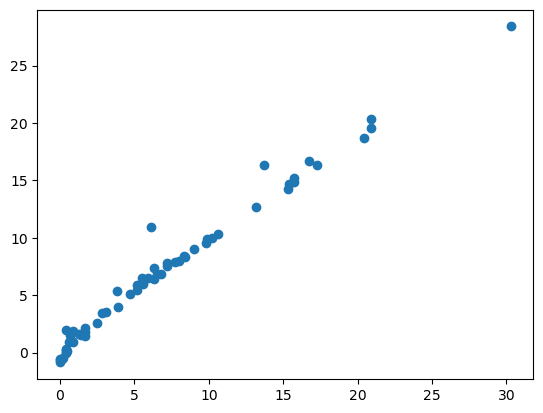

In [44]:
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import mean_absolute_error , r2_score
elasticnetcv = ElasticNetCV()
elasticnetcv.fit(x_train_scaled,y_train)
y_pred = elasticnetcv.predict(x_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print('Mean Absolute Error ',mae)
print('R2 Score',score)
plt.scatter(y_test,y_pred)

In [45]:
ridgecv.alphas

(0.1, 1.0, 10.0)

In [46]:
ridgecv.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_results': None,
 'store_cv_values': 'deprecated'}

In [47]:
lassocv.mse_path_

array([[53.64536329, 65.39074075, 54.89628985, 77.90299066, 39.38236846],
       [46.99139716, 59.81506814, 49.29840831, 75.6645852 , 35.31758355],
       [41.14908917, 53.9178721 , 42.49594889, 68.35708298, 31.76996123],
       [36.05788169, 48.41773965, 36.66879347, 61.92819453, 28.67296816],
       [31.62067285, 42.76466229, 31.68391904, 56.26841266, 24.93183295],
       [27.75285367, 37.81922812, 27.42599138, 51.28216115, 21.56888645],
       [24.3807738 , 33.49107651, 23.7950306 , 45.25481907, 18.66094162],
       [21.44052804, 29.70161639, 20.70460191, 39.90418045, 16.14837778],
       [18.876308  , 26.38208059, 18.07969934, 35.23429953, 13.97821475],
       [16.63960395, 23.47341883, 15.85530749, 31.15712074, 12.10483403],
       [14.68819307, 20.92329068, 13.97555108, 27.59649208, 10.48862803],
       [12.98525144, 18.68636627, 12.39173305, 24.48611006,  9.09521221],
       [11.49893734, 16.72312788, 11.06186319, 21.7677198 ,  7.89445038],
       [10.2013182 , 14.9991189 ,  9.9

## Now we will choose one model with highest accuracy and pickle it

In [85]:
scaler

StandardScaler()

In [89]:
ridge

Ridge()

In [91]:
import pickle

In [93]:
pickle.dump(scaler,open('scaler.pkl','wb')) # Dump scaler model in scaler.pkl file
pickle.dump(ridge,open('ridge.pkl','wb')) # Dumping ridge model in ridge.pkl file